<a href="https://colab.research.google.com/github/armandovl/funciones_descriptiva/blob/main/tablas_distribucion_frecuencia_funcion_grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importar las librerías de cajón
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importamos el data frame
titanic=sns.load_dataset("titanic")
titanic.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [3]:
#dejar solo algunas variables categóricas
titanic_nuevo=titanic[["survived","pclass","sex","alone"]]#todas las demas

#creamos un nuevo data frame donde nuestras variables ya serán categoricas
#incluso podemos cambiar los nombres
titanic_nuevo2=pd.DataFrame()
titanic_nuevo2["sobrevivientes"]=pd.Categorical(titanic_nuevo["survived"])
titanic_nuevo2["clase"]=pd.Categorical(titanic_nuevo["pclass"])
titanic_nuevo2["genero"]=pd.Categorical(titanic_nuevo["sex"])
titanic_nuevo2["estado"]=pd.Categorical(titanic_nuevo["alone"])

In [4]:
titanic_nuevo2.head(5)

,sobrevivientes,clase,genero,estado
0,0,3,male,False
1,1,1,female,False
2,1,3,female,True
3,1,1,female,False
4,0,3,male,True


In [5]:
#Poner el porcentaje para una variable
def var_por(dataFrame,variable):
  #import pandas as pd
  tab_frec=pd.crosstab(index=dataFrame[variable], columns="Conteo")
  tab_frec["porcentaje"]=tab_frec/tab_frec.sum()*100
    
  print(tab_frec.round(1))
  print("Totales   ", dataFrame[variable].count(), "       100%")

In [6]:
var_por(titanic,"sex") #Poner el porcentaje para una variable

col_0   Conteo  porcentaje
sex                       
female     314        35.2
male       577        64.8
Totales    891        100%


In [7]:
#tablas multidimensionales
#tablas de frecuencia cruzadas agrupadas

#Las variables tienen que que ser categóricas

def tablas_frecuencia(variablefila,listaVariablesColumnas):
  
  import pandas as pd #importamos la biblioteca de pandas por si acaso no lo hemos hecho
  
  #creamos la tabla con las columnas que queremos graficar
  tab_10=pd.crosstab( 
        index=variablefila, #variable para las filas
        columns=listaVariablesColumnas, #variables para las columnas
        margins=True #que ponga los totales como "All"            
                      )
  #cambiar nombres de los totales
  tab_10 = tab_10.rename(columns = {"All":"total_filas"})
  tab_10 = tab_10.rename(index = {"All":"total_columnas"})

  frecuencia_absoluta=tab_10 #colocamos nuestra trabla 10 (frecuencias absolutas ) en la variable frecuencia_absoluta


  ####################################  frecuencias relativas marginales ############################

  tab_11=tab_10/tab_10.loc["total_columnas"]*100
  frecuencia_relativa_marginal_columna=tab_11.round(1)

  tab_12=tab_10.T/tab_10["total_filas"]*100
  frecuencia_relativa_marginal_fila=tab_12.T.round(1)

  ########   A ############### B ################################### C #########################
  return frecuencia_absoluta,frecuencia_relativa_marginal_columna,frecuencia_relativa_marginal_fila


In [56]:
fila=titanic_nuevo2.genero #tiene que estar escrita en formato dataFrame.variable
columnas=[titanic_nuevo2.clase,titanic_nuevo2.estado] #tiene que ser las variables en formato de lista

frec_ab, frec_re_mg_col, frec_re_mg_fil =tablas_frecuencia(fila,columnas)

In [57]:
frec_ab

clase              1          2          3      total_filas
estado         False True False True False True            
genero                                                     
female            60   34    44   32    84   60         314
male              47   75    36   72    83  264         577
total_columnas   107  109    80  104   167  324         891

clase      1           2           3      
estado False True  False True  False True 
genero                                    
female    60    34    44    32    84    60
male      47    75    36    72    83   264

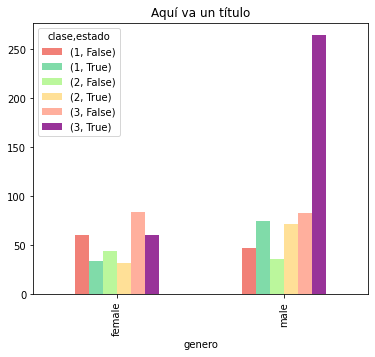

In [60]:
############## Vamos a Graficar #####################

#eliminar columnas totales ,solo una vez
#frec_ab=frec_ab.drop(["total_columnas"],axis=0)
#frec_ab=frec_ab.drop(["total_filas"],axis=1)

frec_ab.plot(kind="bar", #barh para horizontal
        title="Aquí va un título",
        alpha=0.8, #nivel de transparencia
        width=0.5, #ancho de las barras
        figsize=(6,5), #tamaño de la figura
        subplots=False, #poner True para dividir en varios gráficos
        color=["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85","purple","pink","green"]
        ); 

frec_ab


In [10]:
#tablas multidimensionales
#tablas de frecuencia cruzadas agrupadas

#Frecuencias Relativas absolutas

import pandas as pd

tab_10=pd.crosstab(
    index=titanic_nuevo2["sobrevivientes"], #poner el nombre de la variable que van a ir en las filas
    columns=[titanic_nuevo2["genero"],titanic_nuevo2["clase"]], #nombre de las variables que va a ir en las columnas
    margins=True             
                   )
print("Tabla de frecuencias absolutas original \n\n",tab_10,"\n\n")

####################################  Cambiar nombres ############################

'''

tab_10.index=["finado","vivo", "total_columnas"] #nuevos nombres filas
#cambiar nombre
tab_10.columns=["f1","f2", "f3","m1","m2", "m3","total_filas"] #nuevos nombres columnas


print("Tabla de frecuencias absolutas \n\n",tab_10,"\n\n")
'''

####################################  frecuencias relativas globales ############################

'''
tab_11=tab_10/tab_10.loc["total_columnas","total_filas"]*100

print("Tabla de frecuencias relativas globales \n\n",tab_11.round(1))
'''


Tabla de frecuencias absolutas original 

 genero         female          male            All
clase               1   2    3    1    2    3     
sobrevivientes                                    
0                   3   6   72   77   91  300  549
1                  91  70   72   45   17   47  342
All                94  76  144  122  108  347  891 




'\ntab_11=tab_10/tab_10.loc["total_columnas","total_filas"]*100\n\nprint("Tabla de frecuencias relativas globales \n\n",tab_11.round(1))\n'